In [1]:
using HDF5, FFTW, Statistics
using PyPlot
# pyplot()

In [5]:
arxname="../JLDFiles/Deshinibida/180116s1/180116s1cut_evento_1.h5"

"../JLDFiles/Deshinibida/180116s1/180116s1cut_evento_1.h5"

In [6]:
arx=h5open(arxname)

HDF5 data file: ../JLDFiles/Deshinibida/180116s1/180116s1cut_evento_1.h5

In [7]:
names(arx)

7-element Array{String,1}:
 "CMPNeg"          
 "CMPos"           
 "CSDLindenberg"   
 "CanalesSaturados"
 "Canalesrespuesta"
 "LFPTotal"        
 "freq"            

Todos los tiempos estan en cuadros, esto es, en 1/freq de segundo. Para las transformadas de Fourier (o graficas bonitas) tenemos que multiplicar los rangos por los factores adecuados.

In [9]:
lfp=read(arx, "LFPTotal")
saturados=read(arx, "CanalesSaturados")
buenos=read(arx, "Canalesrespuesta")
freq=read(arx, "freq")
#late=read(arx, "latencia")
#fin=read(arx,"final")
#retrazo=read(arx,"retrazo")
#println(freq, " ", late, " ", fin , " ", retrazo )

7.022058198545425

In [10]:
nmax=size(lfp)[3]

2001

In [11]:
iniact=retrazo+late # Retrazo + latencia = inicio de señal

UndefVarError: UndefVarError: retrazo not defined

In [12]:
#rango=iniact:fin
rango=1:nmax

1:2001

In [13]:
buenos

863×2 Array{Int64,2}:
 38   5
 44   3
 53  36
 57  23
 56  30
 32  19
 38   6
 45   8
  4  32
 48  34
 54  28
 42  42
 43  38
  ⋮    
 51  30
 53  20
 44  26
 35  10
 28  16
 41  26
 30  14
 29   5
 59  28
 37  18
 44  28
 43  28

In [14]:
ejemplolfp=lfp[43,38,:];

In [15]:
tmax=nmax/freq
rangotiempos=rango./freq
rangofreqs=rango./tmax
rfreqsim=map(x->-freq/2+(x-1)*freq/(nmax-1),rango);
rfreqsim[1001]

0.0

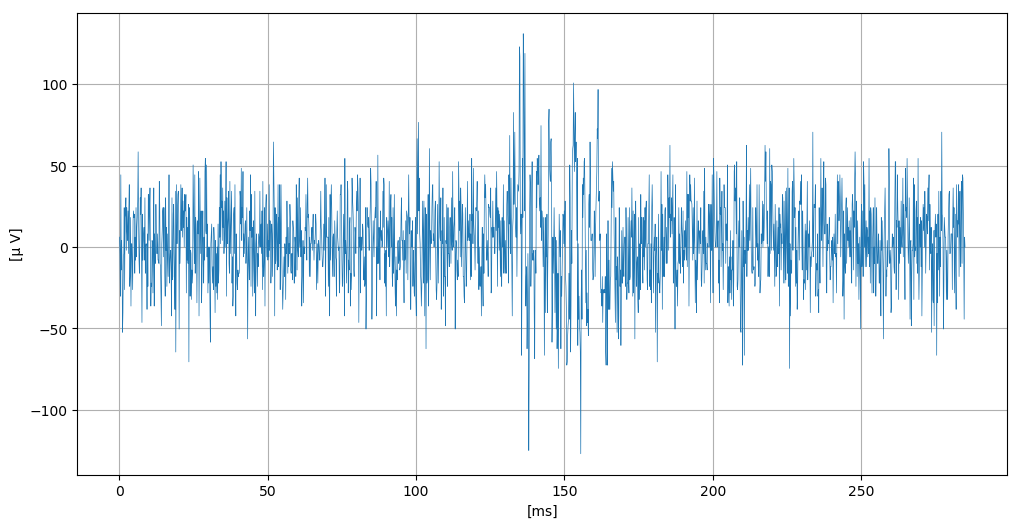

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f6b6c136710>

In [16]:
figura=figure(figsize=(12,6))
grid()
#xlim(120,170)
xlabel("[ms]")
ylabel("[μ V]")
plot(rangotiempos, ejemplolfp, lw=0.5)

In [17]:
plan=plan_fft(ejemplolfp)
fttotal=(plan*ejemplolfp);
ftsym=circshift(fttotal, div(nmax,2));

In [18]:
epoder=map(abs2, ftsym);

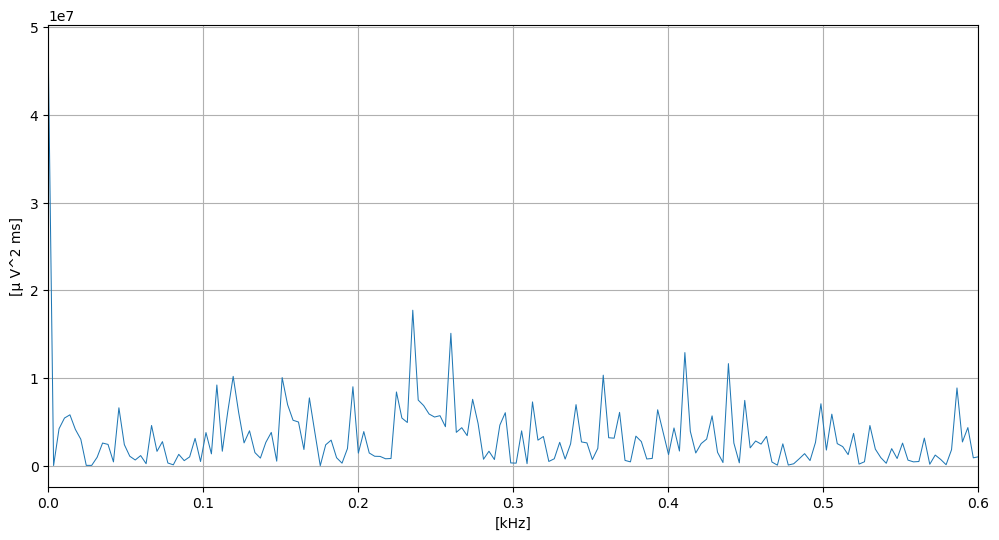

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f6b6c1867f0>

In [19]:
figura=figure(figsize=(12,6))
grid(which="both")
xlim(-0.0,0.6)
xlabel("[kHz]")
ylabel("[μ V^2 ms]")
#yscale("log")
mediorango=1:500
plot(rfreqsim,epoder, lw=0.74)
#plot(rangofreqs[mediorango],epoder2[mediorango])

In [20]:


function indicecercano(a::Number, freqs::Array)
    #encuentra en índice que tiene el número  más cercano a "a" en el Array freqs
    # si a está más lejos de alguno de ellos que su paso
    tol=abs((max(freqs)-min(freqs))/length(freqs))
    result=findfirst(x->isapprox(a,x, atol=tol), freqs)
    return result
end

function indicecercano(a::Number, freqs::StepRangeLen)
    #encuentra en índice que tiene el número  más cercano a "a" en el Array freqs
    # si a está más lejos de alguno de ellos que su paso
    tol=step(freqs)
    result=findfirst(x->isapprox(a,x, atol=tol), freqs)
    return result
end


indicecercano (generic function with 2 methods)

In [21]:
function filtrobanda(freqs, yys::Array, a::Float64, b::Float64 )
    #filtro pasa banda para DFT anular con rango [0, freqmax)
    if a>b
        b,a=a,b
    end
    abajo=indicecercano(a,freqs)
    arriba=indicecercano(b, freqs)
    result=deepcopy(yys)
    l=length(yys)
    for w in 1:l
        if ! (( abajo < w < arriba ) || (l-arriba)<w<(l-abajo) )
        result[w]=0
        end
    end
    return result
end

filtrobanda (generic function with 1 method)

In [22]:
rara2=filtrobanda(rangofreqs, fttotal, 0.001,0.05);

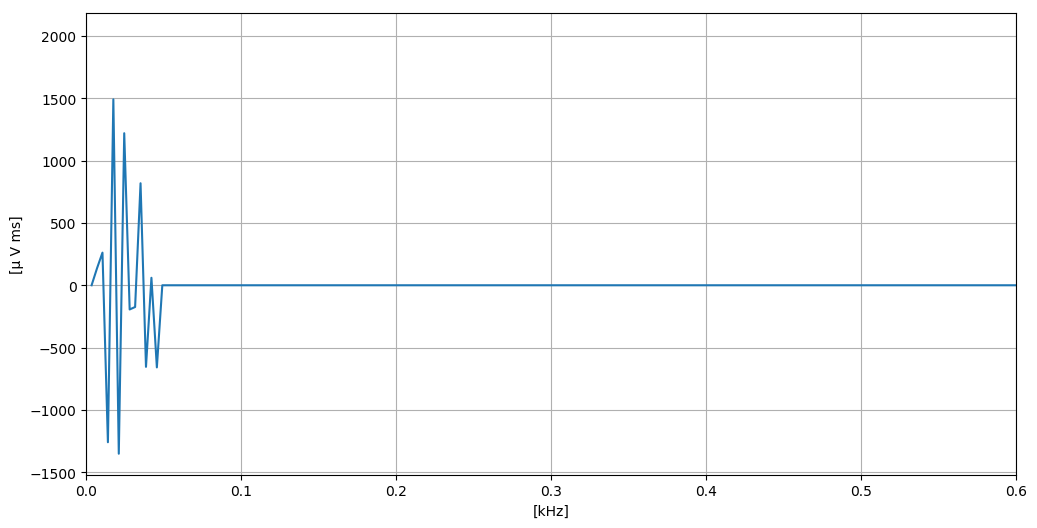

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f6b7625ae48>

In [23]:

figura=figure(figsize=(12,6))
grid(which="both")
xlim(-0.0,0.6)
xlabel("[kHz]")
ylabel("[μ V ms]")
plot(rangofreqs, real(rara2))

In [24]:
rplan=plan_ifft(rara);

UndefVarError: UndefVarError: rara not defined

In [25]:
signalfiltrad2=rplan*rara2

UndefVarError: UndefVarError: rplan not defined

In [26]:
maximum(imag(signalfiltrad))

UndefVarError: UndefVarError: signalfiltrad not defined

In [27]:
maximum(real(signalfiltrad))

UndefVarError: UndefVarError: signalfiltrad not defined

In [28]:
figura=figure(figsize=(13,10))
grid()
#xlim(120,170)
xlabel("[ms]")
ylabel("[μ V]")
plot(rangotiempos, signalfiltrad, lw=1.5)
plot(rangotiempos, signalfiltrad2, lw=1.5)
plot(rangotiempos, signalfiltrad+signalfiltrad2, lw=1.65)
plot(rangotiempos, ejemplolfp, lw=0.3)


UndefVarError: UndefVarError: signalfiltrad not defined

In [29]:
a=0.053022
tol=2*step(rangofreqs)
q(x)=isapprox(a,x, atol=tol)
findfirst(q, rangofreqs)


14

In [30]:
rangofreqs[12:17]

0.0421112935445003:0.003509274462041692:0.05965766585470876

In [31]:
map(q, rangofreqs[12:17])

6-element Array{Bool,1}:
 false
 false
  true
  true
  true
  true

In [32]:
collect(rangofreqs[12:17])

6-element Array{Float64,1}:
 0.0421112935445003  
 0.045620568006541996
 0.049129842468583686
 0.05263911693062538 
 0.05614839139266707 
 0.05965766585470876 

In [33]:
step(rangofreqs)

0.003509274462041692

In [34]:
a=0.005
p=indicecercano(a, rangofreqs)

1

In [35]:
rangofreqs[2]

0.007018548924083384

In [36]:
rangofreqs[57]

0.20002864433637643

In [37]:
figura=figure(figsize=(12,6))
grid()
xlabel("[kHz]")
ylabel("[μ V^2]")
plot(subfreqs,epoder2)

UndefVarError: UndefVarError: subfreqs not defined